## Establishing Baseline Level of Performance


##### The range of errors that can be accepted and desired are outlined by the baseline level of performance. It mainly indicates the human level performance

## Important Lab Setup

In [1]:
import numpy as np
import pandas as pd

#for building linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#visualization lab
import matplotlib.pyplot as plt

## Fixing High Bias

#### If the difference between the cost of the training set and cross-validation set is higher, it would indicate high bias. High Bias can be eradicated through the following steps: 1) Adding Extra features 2) Adding polynomial features 3) Decreasing lambda

In [2]:
#prepare dataset 
data = np.loadtxt('/Users/tinonturjamajumder/Machine learning Specialization /Advanced Learning Algorithm /week 3/Files/home/jovyan/work/data/c2w3_lab2_data1.csv', delimiter= ',')

#drop the output
X = data[:, :-1]
Y = data[:, -1]

#expand the 1-D data into 2-D
Y = np.expand_dims(Y, axis = 1)

print(f" The shape of the input data: {X.shape}")
print(f" The shape of the target data: {Y.shape}")

 The shape of the input data: (100, 1)
 The shape of the target data: (100, 1)


In [3]:
#split the data
x_train, x_, y_train, y_ = train_test_split(X, Y, random_state=88, test_size=0.4)

#again split the data into cross validation and test size

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, random_state=88, test_size=0.5)

#delete the middle variavle
del x_, y_


#realize the shape of the data
print(f" The size of the training(input) data: {x_train.shape}")
print(f" The size of the training(target) data: {y_train.shape}")
print(f" The size of the cross-validation(input) data: {x_cv.shape}")
print(f" The size of the cross-validation(target) data: {y_cv.shape}")
print(f" The size of the test(input) data: {x_test.shape}")
print(f" The size of the test(target) data: {y_test.shape}")

#preview the first 5 rows
print(f"first 5 rows of the training inputs (1 feature): \n {x_train[:5]}\n")




 The size of the training(input) data: (60, 1)
 The size of the training(target) data: (60, 1)
 The size of the cross-validation(input) data: (20, 1)
 The size of the cross-validation(target) data: (20, 1)
 The size of the test(input) data: (20, 1)
 The size of the test(target) data: (20, 1)
first 5 rows of the training inputs (1 feature): 
 [[1454.54545455]
 [1424.24242424]
 [1666.66666667]
 [3424.24242424]
 [2121.21212121]]



#### Model the train and Find the error

In [4]:

#Model selection
model = LinearRegression()


#### find the cost function and add POlYNOMIAL FEATURES

Degree: 1 train_mse_error: 588.645124688854 and CV_mse_error: 566.9478854740248
Degree: 2 train_mse_error: 495.5156678699278 and CV_mse_error: 521.5080851602033
Degree: 3 train_mse_error: 479.36196237452276 and CV_mse_error: 508.86484344460285
Degree: 4 train_mse_error: 479.36145938856384 and CV_mse_error: 506.29373539560504
Degree: 5 train_mse_error: 479.18415922832656 and CV_mse_error: 461.8498051847092
Degree: 6 train_mse_error: 454.8069492497197 and CV_mse_error: 460.56137363212076
Degree: 7 train_mse_error: 453.2099013287967 and CV_mse_error: 279.64063447831006
Degree: 8 train_mse_error: 450.3405433940147 and CV_mse_error: 278.9001329301439
Degree: 9 train_mse_error: 449.54948402972065 and CV_mse_error: 263.83762083974955
Degree: 10 train_mse_error: 421.68446181940385 and CV_mse_error: 256.08254152496045


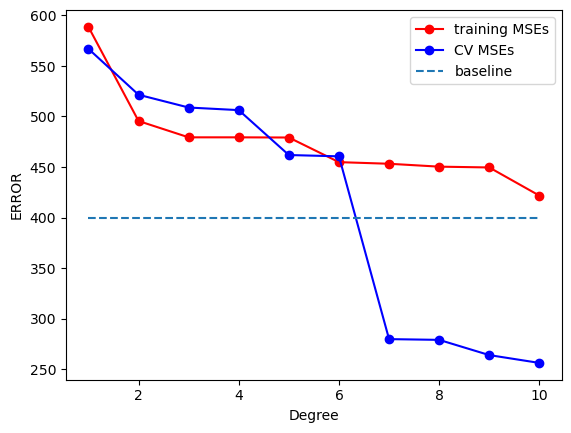

In [5]:
train_error = []
cv_error = []
degrees = range(1,11)
baseline = 400
for degree in range(1, 11):
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_featured = poly.fit_transform(x_train)

    #scale the data
    scaler_linear = StandardScaler()
    x_train_scaled_featured = scaler_linear.fit_transform(x_train_featured)
    

    #for training model
    model.fit(x_train_scaled_featured,y_train)
    yhat = model.predict(x_train_scaled_featured)
    error = mean_squared_error(y_train, yhat)/2
    train_error.append(error)


    #for cross validation model
    x_cv_featured = poly.transform(x_cv) #add polynomial feature
    x_cv_scaled_featured = scaler_linear.transform(x_cv_featured) #scale the data
    model.fit(x_cv_scaled_featured,y_cv) #fit the model
    yhat = model.predict(x_cv_scaled_featured)
    error = mean_squared_error(y_cv, yhat)/2
    cv_error.append(error)

    print(f"Degree: {degree} train_mse_error: {train_error[degree-1]} and CV_mse_error: {cv_error[degree-1]}")
    
    #visualize the plotting
plt.plot(degrees, train_error, marker = 'o' , c = 'r' , label = 'training MSEs')
plt.plot(degrees, cv_error, marker = 'o' , c = 'b' , label = 'CV MSEs')
plt.xlabel('Degree')
plt.ylabel('ERROR')
plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
plt.legend()
plt.show()

In [6]:
def prepare_dataset(filename):
    
    data = np.loadtxt(filename, delimiter=",")
    
    x = data[:,:-1]
    y = data[:,-1]
    
    # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
    x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=80)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)
    
    return x_train, y_train, x_cv, y_cv, x_test, y_test

In [7]:
def train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1,max_degree+1)

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in degrees:

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()
    

the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



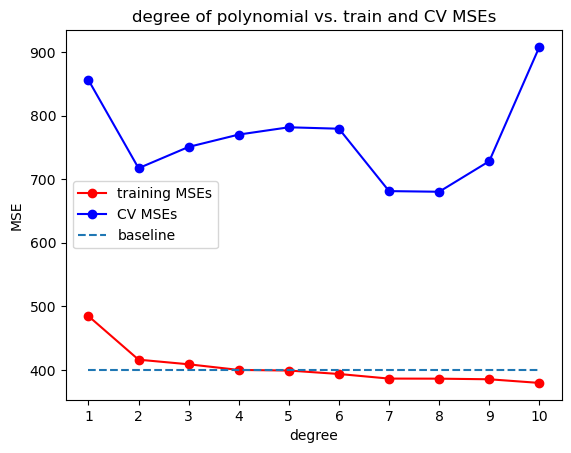

In [8]:
# Split the dataset into train, cv, and test
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/Users/tinonturjamajumder/Machine learning Specialization /Advanced Learning Algorithm /week 3/Files/home/jovyan/work/data/c2w3_lab2_data1.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")

# Instantiate the regression model class
model = LinearRegression()

# Train and plot polynomial regression models
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=400)

##### Observation

###### from the plotting we can see that training mse at some point, specifically after degree 4, do even better than baseline. So we can that models with degree greater than 4 are low bias because they perform close to ot better than baseline.

###### However, if the baseline is defined lower, then the models are still considered high bias. 


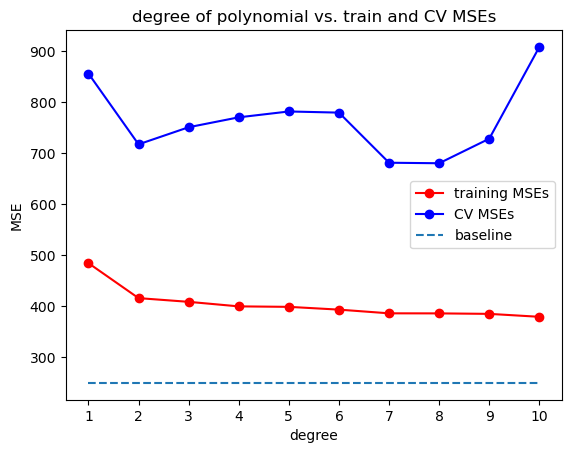

In [9]:
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=250)

### Try Getting Additional Features

In [10]:
#in the previous dataset we have only feature. Now we can run another feature collection campaign that captures another feature.
#your dataset will now have 2 columns for the input features as shown below
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/Users/tinonturjamajumder/Machine learning Specialization /Advanced Learning Algorithm /week 3/Files/home/jovyan/work/data/c2w3_lab2_data2.csv')
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test (input) is: {x_test.shape}")
print(f"the shape of the test (target) is: {y_test.shape}\n")

#preview the first 5 rows of the training set
print(f" The first 5 rows of the training inputs: {x_train[:5]}")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

the shape of the test (input) is: (20, 2)
the shape of the test (target) is: (20,)

 The first 5 rows of the training inputs: [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]


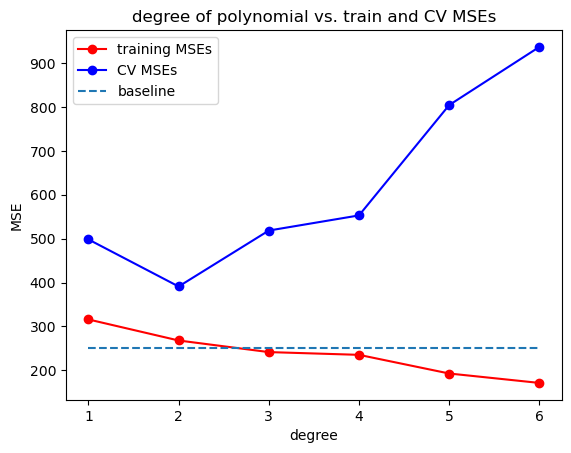

In [11]:
#again go thorogh the same process
model = LinearRegression()

train_plot_poly(model, x_train , y_train, x_cv, y_cv, max_degree=6,baseline=250)

### Try decreasing the regularization parameter

In [36]:
#lambda greater w patta kom high bias
#decreae lambda

#define lambdas to plot
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]


#define degree of polynomial and train for each value of lambda
def reg_paracheck(reg_params, degree, x_train, y_train, x_cv, y_cv, baseline = None):

    train_mse = []
    cv_mse = []
    
    for reg_param in reg_params:
        #add additional features
        poly= PolynomialFeatures(degree, include_bias=False)
        x_train_featured = poly.fit_transform(x_train)
        x_cv_featured = poly.transform(x_cv)



        #scaling the data
        
        scaler_linear = StandardScaler()
        x_train_featured_scaled = scaler_linear.fit_transform(x_train_featured)

        #model name
        model = Ridge(alpha=reg_param)
        model.fit(x_train_featured_scaled, y_train)

        #calculate the training mse
        yhat = model.predict(x_train_featured_scaled)
        training_mse = mean_squared_error(yhat, y_train)/2
        train_mse.append(training_mse)


        #scaling cross validation
        x_cv_featured_scaled = scaler_linear.transform(x_cv_featured)
        yhat = model.predict(x_cv_featured_scaled)
        cv_error = mean_squared_error(yhat, y_cv)/2
        cv_mse.append(cv_error)


    #plotting the mse
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mse, marker = 'o', c='r', label = 'baseline')
    plt.plot(reg_params, cv_mse, marker = 'o', c='b', label = 'baseline')
    if baseline is not None:
        plt.axhline(y=baseline, linestyle='--', color='g', label='Baseline')

    plt.xlabel('regularization parameters')
    plt.ylabel('training MSE')
    plt.legend()
    plt.show()
            
            
            


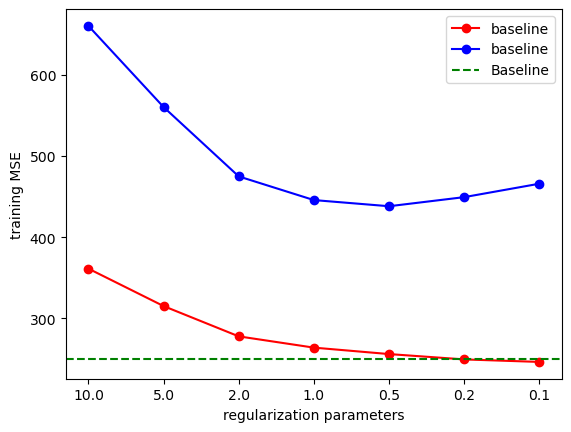

In [40]:
reg_params = np.array([10, 5, 2, 1, 0.5, 0.2, 0.1])
#expand the dimension

reg_paracheck(reg_params,4,x_train, y_train, x_cv, y_cv, baseline=250)


In [18]:
print(f"reg_params:{reg_params}")
print(f"Train_mse: {train_mse}")

reg_params:[10.   5.   2.   1.   0.5  0.2  0.1]
Train_mse: [361.14589751012716, 315.03091537638755, 277.7000188093303, 263.8146713314817, 255.88128047279602, 249.29052944893516, 246.20530905681042, 361.14589751012716, 315.03091537638755, 277.7000188093303, 263.8146713314817, 255.88128047279602, 249.29052944893516, 246.20530905681042]


In [ ]:
a=np.array([2,3])

In [41]:
print(a)

[2 3]


In [43]:
reg_params = np.array([10, 5, 2, 1, 0.5, 0.2, 0.1])
for reg_param in reg_params:
    print(reg_param)

10.0
5.0
2.0
1.0
0.5
0.2
0.1


In [27]:
def reg_paracheck(reg_params, degree, x_train, y_train, x_cv, y_cv, baseline=None):
    train_mse = []  # Initialize training errors
    cv_mse = []  # Initialize cross-validation errors

    for reg_param in reg_params:
        # Generate polynomial features
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_featured = poly.fit_transform(x_train)
        x_cv_featured = poly.transform(x_cv)

        # Scale the data
        scaler = StandardScaler()
        x_train_featured_scaled = scaler.fit_transform(x_train_featured)
        x_cv_featured_scaled = scaler.transform(x_cv_featured)

        # Train Ridge Regression model
        model = Ridge(alpha=reg_param)
        model.fit(x_train_featured_scaled, y_train)

        # Compute training MSE
        yhat_train = model.predict(x_train_featured_scaled)
        train_error = mean_squared_error(y_train, yhat_train) / 2
        train_mse.append(train_error)

        # Compute cross-validation MSE
        yhat_cv = model.predict(x_cv_featured_scaled)
        cv_error = mean_squared_error(y_cv, yhat_cv) / 2
        cv_mse.append(cv_error)

    # Plotting the results
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mse, marker='o', c='r', label='Training MSE')
    plt.plot(reg_params, cv_mse, marker='o', c='b', label='CV MSE')
    if baseline is not None:
        plt.plot(reg_params, [baseline] * len(reg_params), linestyle='--', label='Baseline')
    plt.xlabel('Regularization Parameter (λ)')
    plt.ylabel('Mean Squared Error')
    
    plt.legend()
    plt.show()


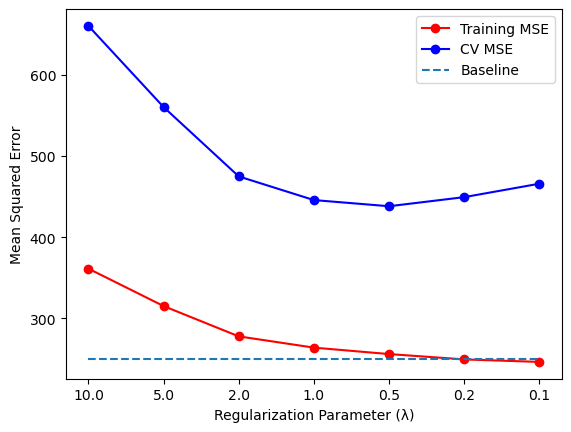

In [28]:
baseline = 0.2  # Example baseline
reg_paracheck(reg_params, degree=4, x_train=x_train, y_train=y_train, x_cv=x_cv, y_cv=y_cv, baseline=250)


### Fixing High Variance 

In [41]:
#the steps involved fixing high variance
# Increase the data size
#reduce some features may be
#increase lambda
